# Peer-graded Assignment: Build a Regression Model in Keras

In this course project, you will build a regression model using the deep learning Keras library, and then you will experiment with increasing the number of training epochs and changing number of hidden layers and you will see how changing these parameters impacts the performance of the model.

This assignment will be marked by your peers and will be worth 20% of your total grade. The breakdown will be:

Part A-D: 5 marks each

Step-By-Step Assignment Instructions
1. Assignment Topic: In this project, you will build a regression model using the Keras library to model the same data about concrete compressive strength that we used in labs 3.
2. Concrete Data: For your convenience, the data can be found here again: https://cocl.us/concrete_data. To recap, the predictors in the data of concrete strength include:
    * Cement
    * Blast Furnace Slag
    * Fly Ash
    * Water
    * Superplasticizer
    * Coarse Aggregate
    * Fine Aggregate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import types
from botocore.client import Config
import ibm_boto3

Using TensorFlow backend.


In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
concrete_data = pd.read_csv(body)
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### A. Build a baseline model (5 marks)

Use the Keras library to build a neural network with the following:

One hidden layer of 10 nodes, and a ReLU activation function

Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the [train_test_split helper function from Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [4]:
# get data from the column in predictors and target groups
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [5]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(predictors.shape[1],)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [6]:
# build the model
model = regression_model()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# fit the model
epochs = 50
split=0.3
mean_squared_errors_amount = 50
mean_squared_errors_a = []
for x in range(0, mean_squared_errors_amount):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=split, random_state=x)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors_a.append(mean_square_error)

Instructions for updating:
Use tf.cast instead.


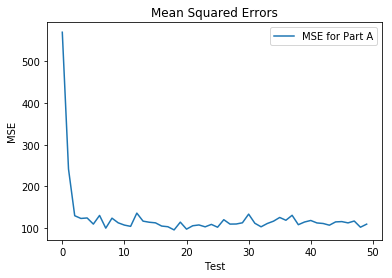

In [8]:
# plot MSE of model over each test
plt.plot(mean_squared_errors_a)
plt.title('Mean Squared Errors')
plt.ylabel('MSE')
plt.xlabel('Test')
plt.legend(['MSE for Part A'], loc='upper right')
plt.show()

In [9]:
Step_A_Mean_MSE = stat.mean(mean_squared_errors_a)
print('Mean of MSE is: ', Step_A_Mean_MSE)

Mean of MSE is:  124.87411002804696


In [10]:
Step_A_Stdev_MSE = stat.stdev(mean_squared_errors_a)
print('Standard Devation of MSE is: ', Step_A_Stdev_MSE)

Standard Devation of MSE is:  67.3657775282499


### B. Normalize the data (5 marks)

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

In [11]:
#normalize the predictors
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [12]:
# fit the model
epochs = 5
split=0.30
mean_squared_errors_amount = 50
mean_squared_errors_b = []
for x in range(0, mean_squared_errors_amount):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=split, random_state=x)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors_b.append(mean_square_error)

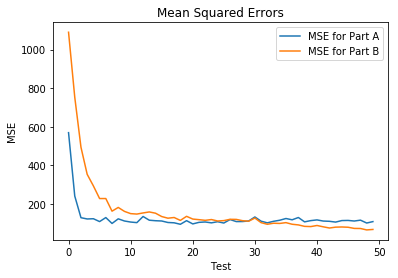

In [13]:
# plot MSE of model over each test
plt.plot(mean_squared_errors_a)
plt.plot(mean_squared_errors_b)
plt.title('Mean Squared Errors')
plt.ylabel('MSE')
plt.xlabel('Test')
plt.legend(['MSE for Part A','MSE for Part B'], loc='upper right')
plt.show()

In [14]:
Step_B_Mean_MSE = stat.mean(mean_squared_errors_b)
print('Mean of MSE from Step A is: ', Step_A_Mean_MSE)
print('Mean of MSE from Step B is: ', Step_B_Mean_MSE)

Mean of MSE from Step A is:  124.87411002804696
Mean of MSE from Step B is:  166.00978767124138


In [15]:
Step_B_Stdev_MSE = stat.stdev(mean_squared_errors_b)
print('Standard Devation of MSE from Step A is: ', Step_A_Stdev_MSE)
print('Standard Devation of MSE from Step B is: ', Step_B_Stdev_MSE)

Standard Devation of MSE from Step A is:  67.3657775282499
Standard Devation of MSE from Step B is:  176.28219451821946


### C. Increate the number of epochs (5 marks)

Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

In [16]:
# fit the model
epochs = 100
split=0.3
mean_squared_errors_amount = 50
mean_squared_errors_c = []
for x in range(0, mean_squared_errors_amount):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=split, random_state=x)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors_c.append(mean_square_error)

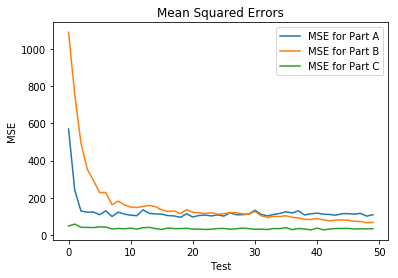

In [17]:
# plot MSE of model over each test
plt.plot(mean_squared_errors_a)
plt.plot(mean_squared_errors_b)
plt.plot(mean_squared_errors_c)
plt.title('Mean Squared Errors')
plt.ylabel('MSE')
plt.xlabel('Test')
plt.legend(['MSE for Part A','MSE for Part B','MSE for Part C'], loc='upper right')
plt.show()

In [18]:
Step_C_Mean_MSE = stat.mean(mean_squared_errors_c)
print('Mean of MSE from Step A is: ', Step_A_Mean_MSE)
print('Mean of MSE from Step B is: ', Step_B_Mean_MSE)
print('Mean of MSE from Step C is: ', Step_C_Mean_MSE)

Mean of MSE from Step A is:  124.87411002804696
Mean of MSE from Step B is:  166.00978767124138
Mean of MSE from Step C is:  35.86651449269708


In [19]:
Step_C_Stdev_MSE = stat.stdev(mean_squared_errors_c)
print('Standard Devation of MSE from Step A is: ', Step_A_Stdev_MSE)
print('Standard Devation of MSE from Step B is: ', Step_B_Stdev_MSE)
print('Standard Devation of MSE from Step C is: ', Step_C_Stdev_MSE)

Standard Devation of MSE from Step A is:  67.3657775282499
Standard Devation of MSE from Step B is:  176.28219451821946
Standard Devation of MSE from Step C is:  5.39417378107682


### D. Increase the number of hidden layers (5 marks)

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

In [20]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(predictors.shape[1],)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [21]:
# build the model
model = regression_model()

In [22]:
# fit the model
epochs = 100
split=0.3
mean_squared_errors_amount = 50
mean_squared_errors_d = []
for x in range(0, mean_squared_errors_amount):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=split, random_state=x)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors_d.append(mean_square_error)

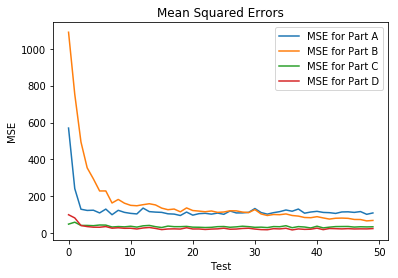

In [23]:
# plot MSE of model over each test
plt.plot(mean_squared_errors_a)
plt.plot(mean_squared_errors_b)
plt.plot(mean_squared_errors_c)
plt.plot(mean_squared_errors_d)
plt.title('Mean Squared Errors')
plt.ylabel('MSE')
plt.xlabel('Test')
plt.legend(['MSE for Part A','MSE for Part B','MSE for Part C','MSE for Part D'], loc='upper right')
plt.show()

In [24]:
Step_D_Mean_MSE = stat.mean(mean_squared_errors_d)
print('Mean of MSE from Step A is: ', Step_A_Mean_MSE)
print('Mean of MSE from Step B is: ', Step_B_Mean_MSE)
print('Mean of MSE from Step C is: ', Step_C_Mean_MSE)
print('Mean of MSE from Step D is: ', Step_D_Mean_MSE)

Mean of MSE from Step A is:  124.87411002804696
Mean of MSE from Step B is:  166.00978767124138
Mean of MSE from Step C is:  35.86651449269708
Mean of MSE from Step D is:  27.48171090510991


In [25]:
Step_D_Stdev_MSE = stat.stdev(mean_squared_errors_d)
print('Standard Devation of MSE from Step A is: ', Step_A_Stdev_MSE)
print('Standard Devation of MSE from Step B is: ', Step_B_Stdev_MSE)
print('Standard Devation of MSE from Step C is: ', Step_C_Stdev_MSE)
print('Standard Devation of MSE from Step D is: ', Step_D_Stdev_MSE)

Standard Devation of MSE from Step A is:  67.3657775282499
Standard Devation of MSE from Step B is:  176.28219451821946
Standard Devation of MSE from Step C is:  5.39417378107682
Standard Devation of MSE from Step D is:  14.038349014631159
